# Country GDPs vs Greenhouse Gas Emissions
This project seeks to investigate the correlation in countries' GDPs with their annual greenhouse gas emissions. The goal of this project is to evaluate the economic implications of using fossil-fuels vs. renewable energy, and to assess how feasible it would be for developing countries to adopt net-zero emission policies while upholding their economic growth objectives.

# Data
**CO2 emissions per capita vs GDP per capita**: https://ourworldindata.org/grapher/co2-emissions-vs-gdp

# Importing Libraries

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading and Cleaning the Emission vs GDP dataset

In [113]:
df = pd.read_csv("Data/co2-emissions-vs-gdp.csv")
df

,Entity,Code,Year,Per capita CO2 emissions,GDP per capita,145446-annotations,"Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1949,0.001912,NaN,NaN,7663783.0,NaN
2,Afghanistan,AFG,1950,0.010871,1156.0,NaN,7752000.0,NaN
3,Afghanistan,AFG,1951,0.011684,1170.0,NaN,7840000.0,NaN
4,Afghanistan,AFG,1952,0.011542,1189.0,NaN,7936000.0,NaN
...,...,...,...,...,...,...,...,...
53089,Zimbabwe,ZWE,1899,NaN,NaN,NaN,1898216.0,NaN
53090,Zimbabwe,ZWE,1900,NaN,NaN,NaN,1911594.0,NaN
53091,Zimbabwe,ZWE,1901,NaN,NaN,NaN,1925066.0,NaN
53092,Zimbabwe,ZWE,1902,NaN,NaN,NaN,1938469.0,NaN


In [114]:
# can't use data points missing GDP per capita or per capita CO2 emissions, so drop those rows
df = df[df['Per capita CO2 emissions'].notna()]
df = df[df['GDP per capita'].notna()]

# drop 'annotations' column
df = df.drop(columns=['145446-annotations'])

In [115]:
# saving cleaned dataframe to csv
df.to_csv('Data/cleanedGDPEmissionData.csv', index = False)
df = pd.read_csv('Data/cleanedGDPEmissionData.csv')
df

,Entity,Code,Year,Per capita CO2 emissions,GDP per capita,"Total population (Gapminder, HYDE & UN)",Continent
0,Afghanistan,AFG,1950,0.010871,1156.00,7752000.0,NaN
1,Afghanistan,AFG,1951,0.011684,1170.00,7840000.0,NaN
2,Afghanistan,AFG,1952,0.011542,1189.00,7936000.0,NaN
3,Afghanistan,AFG,1953,0.013216,1240.00,8040000.0,NaN
4,Afghanistan,AFG,1954,0.013036,1245.00,8151000.0,NaN
...,...,...,...,...,...,...,...
13586,Zimbabwe,ZWE,2014,0.881181,1594.00,13587000.0,NaN
13587,Zimbabwe,ZWE,2015,0.880960,1560.00,13815000.0,Africa
13588,Zimbabwe,ZWE,2016,0.770831,1534.00,14030000.0,NaN
13589,Zimbabwe,ZWE,2017,0.719733,1582.37,14237000.0,NaN


# Exploratory Data Analysis

In [116]:
# lets look at the describe function to get a statistical overview of our data
df.describe()

,Year,Per capita CO2 emissions,GDP per capita,"Total population (Gapminder, HYDE & UN)"
count,13591.000000,13591.000000,13591.000000,1.359100e+04
mean,1966.806048,3.787321,8620.796133,3.424790e+07
std,41.504854,6.499568,11491.944759,1.897451e+08
min,1800.000000,-2.674945,0.000000,2.500000e+04
25%,1952.000000,0.278963,1943.000000,3.043000e+06
50%,1976.000000,1.330766,4415.000000,7.251000e+06
75%,1998.000000,5.087487,10063.900000,2.148585e+07
max,2018.000000,101.021714,156299.000000,7.631091e+09


In [117]:
# the min per capita CO2 emissions seems to be negative, which doesn't mathematically make sense as Per Capita CO2 emissions = CO2 emissions / total population. I will investigate where these records are coming from.
df[df['Per capita CO2 emissions'] < 0]

,Entity,Code,Year,Per capita CO2 emissions,GDP per capita,"Total population (Gapminder, HYDE & UN)",Continent
6532,Kuwait,KWT,1952,-2.674945,47856.0,163000.0,NaN
6533,Kuwait,KWT,1953,-0.305333,49989.0,168000.0,NaN
10385,Saudi Arabia,SAU,1951,-0.108809,3784.0,3199000.0,NaN
10386,Saudi Arabia,SAU,1952,-0.052438,3937.0,3284000.0,NaN
10463,Senegal,SEN,1968,-0.020282,2389.0,4014000.0,NaN
13211,Venezuela,VEN,1930,-0.327070,2923.0,3562393.0,NaN
13212,Venezuela,VEN,1931,-0.071212,2904.0,3601636.0,NaN


In [118]:
# there are only 7 out of 13k data points with negative values, most likely due to a rounding error since most of them have very small values. 
# I will remove these as they are outliers that don't have any real significance due to being negative.
df = df[df['Per capita CO2 emissions'] >= 0]
df.describe()

,Year,Per capita CO2 emissions,GDP per capita,"Total population (Gapminder, HYDE & UN)"
count,13584.000000,13584.000000,13584.000000,1.358400e+04
mean,1966.815665,3.789535,8616.862356,3.426423e+07
std,41.512427,6.500479,11484.011596,1.897926e+08
min,1800.000000,0.000110,0.000000,2.500000e+04
25%,1952.000000,0.279336,1942.982500,3.043500e+06
50%,1976.000000,1.333548,4416.675000,7.260308e+06
75%,1998.000000,5.092743,10062.765000,2.148823e+07
max,2018.000000,101.021714,156299.000000,7.631091e+09


Text(0, 0.5, 'Counts')

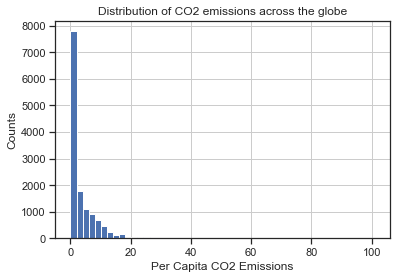

In [119]:
# lets take a closer look at the distribution of per capita CO2 emissions
hist = df['Per capita CO2 emissions'].hist(bins=50, range = [min(df['Per capita CO2 emissions']), max(df['Per capita CO2 emissions'])])
hist.set_title('Distribution of CO2 emissions across the globe')
hist.set_xlabel('Per Capita CO2 Emissions')
hist.set_ylabel('Counts')

Text(0, 0.5, 'Counts')

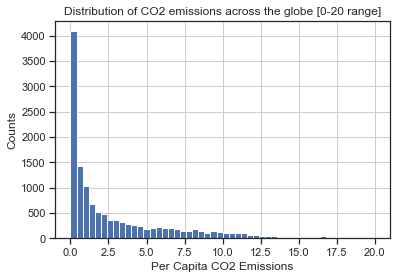

In [120]:
# We see a left-skewed distribution of per capita CO2 emissions, suggesting that over time the majority of countries have had per capita CO2 emissions between 0 and 10
hist = df['Per capita CO2 emissions'].hist(bins=50, range = [0, 20])
hist.set_title('Distribution of CO2 emissions across the globe [0-20 range]')
hist.set_xlabel('Per Capita CO2 Emissions')
hist.set_ylabel('Counts')

In [121]:
# Taking a closer look at this histogram between 0-20 shows the left-skew is even more pronounced in the 0-1 range, before tapering off towards the 10-12 range.

Text(0, 0.5, 'Counts')

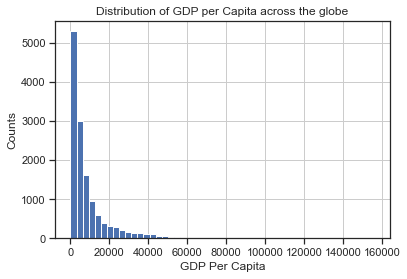

In [122]:
# Lets take a look at the distribution of GDP per capita.
hist = df['GDP per capita'].hist(bins=50)
hist.set_title('Distribution of GDP per Capita across the globe')
hist.set_xlabel('GDP Per Capita')
hist.set_ylabel('Counts')

Text(0, 0.5, 'Counts')

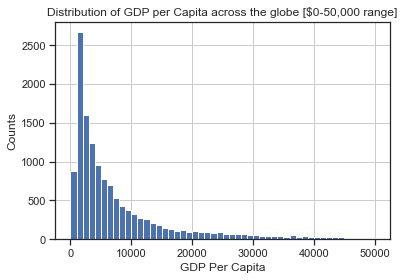

In [123]:
# taking another look scaling the x-axis:
histScaled = df['GDP per capita'].hist(bins=50, range = [0, 50000])
histScaled.set_title('Distribution of GDP per Capita across the globe [$0-50,000 range]')
histScaled.set_xlabel('GDP Per Capita')
histScaled.set_ylabel('Counts')

In [124]:
# There again seems to be a left-skew, now in the GDP data. 
# My assumption for these left-skews is that we are looking at historical data dating back to the 1800s, and thus there are many data points with smaller values.
df.columns

Index(['Entity', 'Code', 'Year', 'Per capita CO2 emissions', 'GDP per capita',
       'Total population (Gapminder, HYDE & UN)', 'Continent'],
      dtype='object')

In [125]:
# Lets take a look at correlations between the values
corr = df[['Per capita CO2 emissions', 'GDP per capita', 'Total population (Gapminder, HYDE & UN)']].corr()
corr

,Per capita CO2 emissions,GDP per capita,"Total population (Gapminder, HYDE & UN)"
Per capita CO2 emissions,1.000000,0.672298,0.000100
GDP per capita,0.672298,1.000000,-0.003304
"Total population (Gapminder, HYDE & UN)",0.000100,-0.003304,1.000000


<AxesSubplot:>

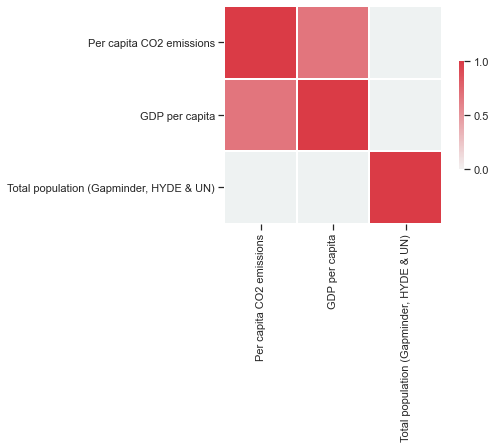

In [126]:
cmap = sns.diverging_palette(180, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1, center = 0, 
           square = True, linewidths=1, cbar_kws={"shrink": .5})

GDP per capita vs. Per Capita CO2 Emissions


<AxesSubplot:xlabel='GDP per capita', ylabel='Per capita CO2 emissions'>

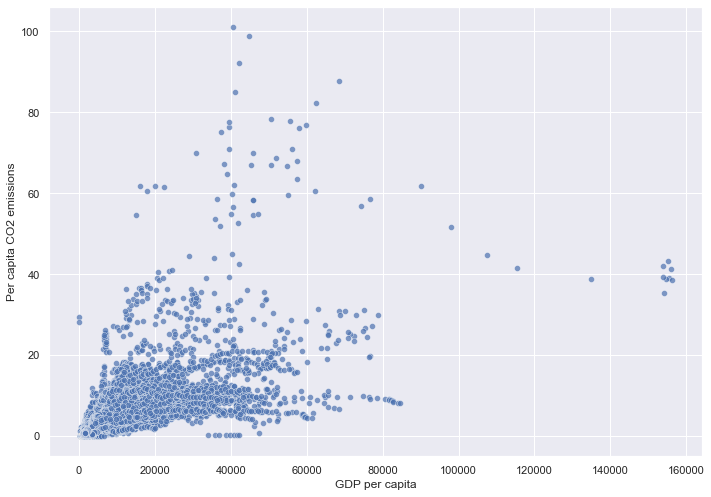

In [172]:
# According to this data, there is a 0.67 correlation between per capita CO2 emissions and GDP per capita. 
# Lets plot this relationship to assess the correlation visually:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
print('GDP per capita vs. Per Capita CO2 Emissions')
sns.scatterplot(data=df, x = 'GDP per capita', y = 'Per capita CO2 emissions', alpha = 0.7)

GDP per capita vs. Per Capita CO2 Emissions, Colored by continent


<AxesSubplot:xlabel='GDP per capita', ylabel='Per capita CO2 emissions'>

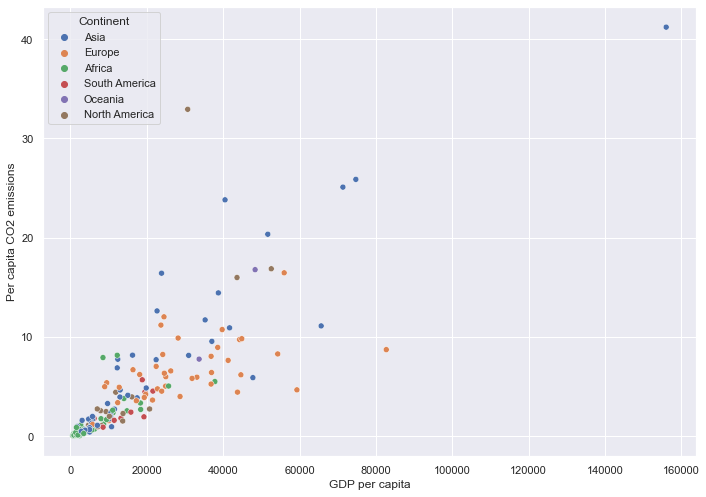

In [173]:
print('GDP per capita vs. Per Capita CO2 Emissions, Colored by continent')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df, x = 'GDP per capita', y = 'Per capita CO2 emissions', hue = 'Continent')

GDP per capita vs. Per Capita CO2 Emissions, Faceted by Continent


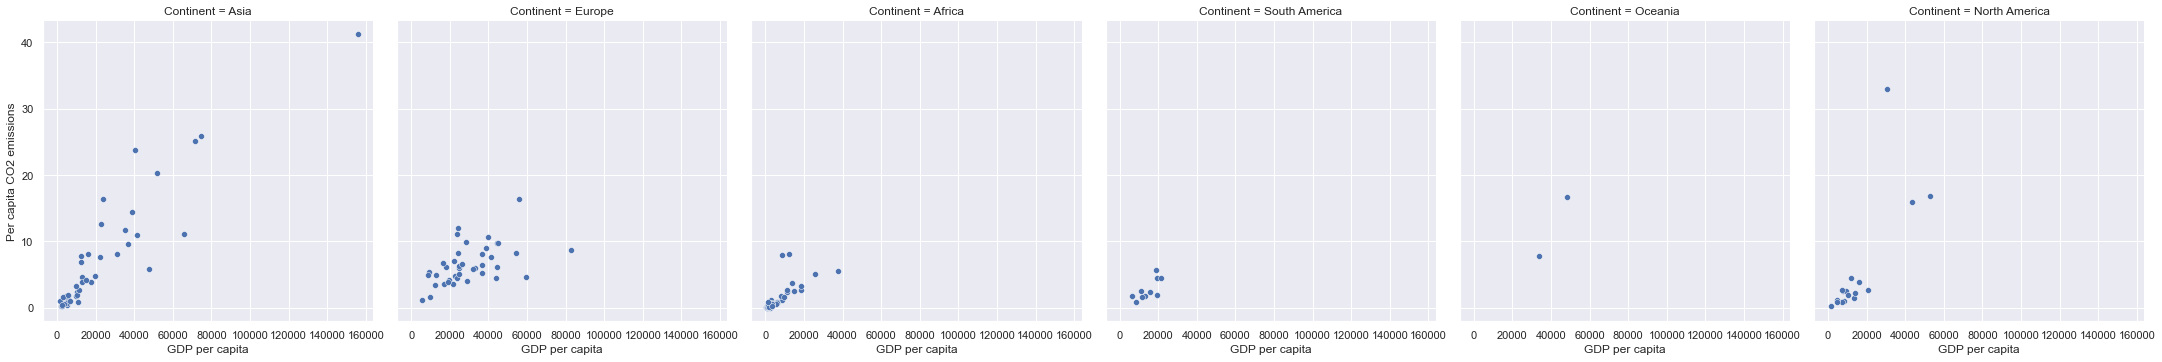

In [149]:
print('GDP per capita vs. Per Capita CO2 Emissions, Faceted by Continent')
sns.relplot(
        data = df, x = 'GDP per capita', 
        y = 'Per capita CO2 emissions',
        col='Continent', kind = "scatter",
)

<AxesSubplot:xlabel='GDP per capita', ylabel='Per capita CO2 emissions'>

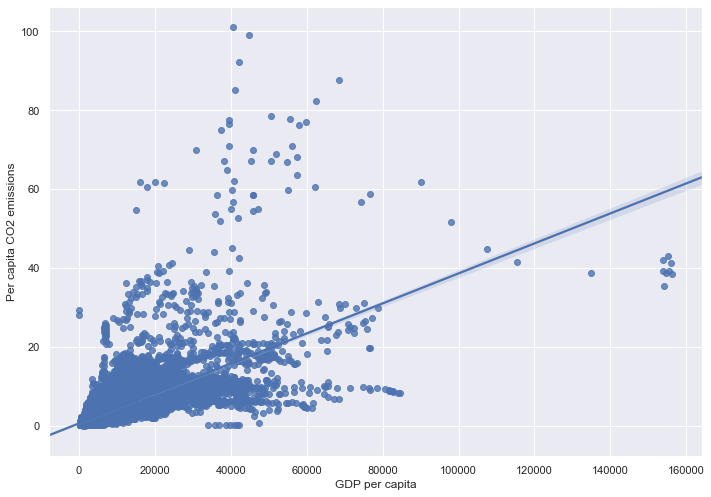

In [147]:
# We can see that across continents, there seems to be a positive linear correlation between GDP per capita and CO2 emissions per capita.
# Lets plot these with a regression line and a confidence interval of 68% to visualize this positive correlation even further:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(data = df, x = 'GDP per capita', 
            y = 'Per capita CO2 emissions', 
            ci=68, truncate=False, 
)

In [170]:
df[df['Entity'] == "Brazil"]

,Entity,Code,Year,Per capita CO2 emissions,GDP per capita,"Total population (Gapminder, HYDE & UN)",Continent
1487,Brazil,BRA,1901,0.113602,940.00,18513216.0,NaN
1488,Brazil,BRA,1902,0.132434,921.00,18923954.0,NaN
1489,Brazil,BRA,1903,0.126165,920.00,19341472.0,NaN
1490,Brazil,BRA,1904,0.132560,918.00,19762800.0,NaN
1491,Brazil,BRA,1905,0.138663,925.00,20187716.0,NaN
...,...,...,...,...,...,...,...
1600,Brazil,BRA,2014,2.583763,15258.00,202764000.0,NaN
1601,Brazil,BRA,2015,2.421915,15826.00,204472000.0,South America
1602,Brazil,BRA,2016,2.320701,13873.00,206163008.0,NaN
1603,Brazil,BRA,2017,2.331611,13951.60,207834000.0,NaN


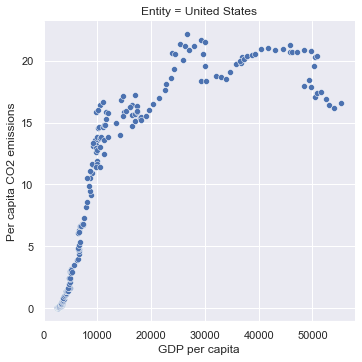

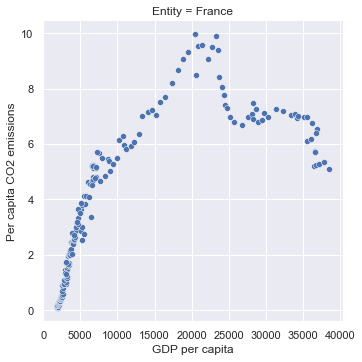

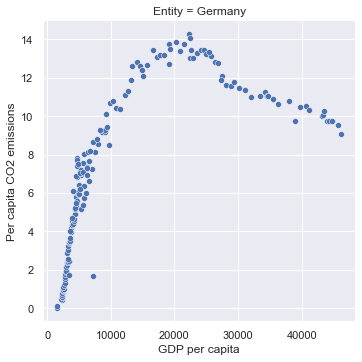

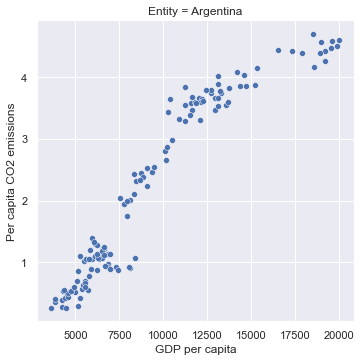

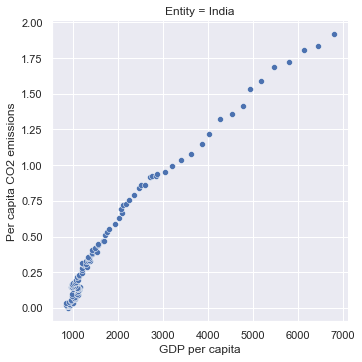

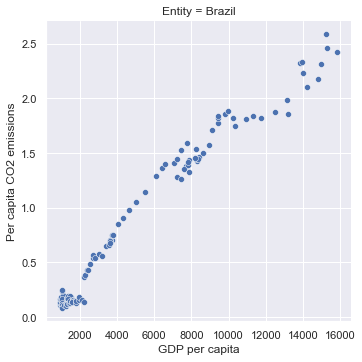

In [171]:
# Lets take a look at specific countries to see if there is a suggested non-linear correlation.
# We'll take a look at a couple developed and developing countries
countries = ['United States', 'France', 'Germany', 'Argentina', 'India', 'Brazil']

for country in countries:
    new_df = df[df['Entity'] == country]
    sns.relplot(data=new_df, x = 'GDP per capita', y = 'Per capita CO2 emissions', col = 'Entity')